In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['figure.figsize'] = [16, 5]
# plt.rcParams['figure.dpi'] = 140
plt.style.use('seaborn')

In [2]:
# load data dan perbaikan tipe data sesuai dengan notebook deskriptif analisis
file = 'https://raw.githubusercontent.com/audit-ti/pjj-pengolahan-data-python/main/03.%20Statistika%20Terapan/Data%20Stater.csv'
raw_df = pd.read_csv(file, parse_dates=["Tanggal Invoice"], thousands=",")
raw_df.columns = [col_name.strip() for col_name in raw_df.columns]
replaceDash = raw_df.Discount.str.replace('-','0')
raw_df.Discount = replaceDash.astype('int64')
raw_df['ID Salesman'] = raw_df['ID Salesman'].astype('object')
raw_df['Jenis Kirim'] = raw_df['Jenis Kirim'].astype('object') 
raw_df.head()

,No.Invoice,Tanggal Invoice,No.Urut,Nama Pelanggan,Kode Produk,Quantity,Gross sales,Discount,Net sales,Jenis Kirim,Ongkir/Unit,Total Sales,ID Salesman
0,ORD-BS-00140940342-1,2020-01-02,1,Pittsburgh Mountain Machines,BM-CC-057,1,7460,0,7460,1,50,7510,669618
1,ORD-BS-00140940342-1,2020-01-02,2,Pittsburgh Mountain Machines,BR-EC-009,1,2240,0,2240,1,50,2290,669618
2,ORD-BS-00140940342-1,2020-01-02,3,Pittsburgh Mountain Machines,BM-OC-049,2,7680,0,15360,1,50,15410,669618
3,ORD-BS-00141011421-2,2020-01-04,1,Pittsburgh Mountain Machines,BR-TC-040,1,3200,0,3200,2,30,3260,848311
4,ORD-BS-00141011421-2,2020-01-04,2,Pittsburgh Mountain Machines,BM-CC-059,1,5330,0,5330,1,50,5380,848311


## Probability Sampling
### Simple random sampling

In [3]:
# simple random dedicated N
simple = raw_df.sample(n=533, random_state=814)
print(simple.shape)

raw_df['simple_n'] = raw_df.index.isin(simple.index)
raw_df

(533, 13)


,No.Invoice,Tanggal Invoice,No.Urut,Nama Pelanggan,Kode Produk,Quantity,Gross sales,Discount,Net sales,Jenis Kirim,Ongkir/Unit,Total Sales,ID Salesman,simple_n
0,ORD-BS-00140940342-1,2020-01-02,1,Pittsburgh Mountain Machines,BM-CC-057,1,7460,0,7460,1,50,7510,669618,False
1,ORD-BS-00140940342-1,2020-01-02,2,Pittsburgh Mountain Machines,BR-EC-009,1,2240,0,2240,1,50,2290,669618,False
2,ORD-BS-00140940342-1,2020-01-02,3,Pittsburgh Mountain Machines,BM-OC-049,2,7680,0,15360,1,50,15410,669618,False
3,ORD-BS-00141011421-2,2020-01-04,1,Pittsburgh Mountain Machines,BR-TC-040,1,3200,0,3200,2,30,3260,848311,False
4,ORD-BS-00141011421-2,2020-01-04,2,Pittsburgh Mountain Machines,BM-CC-059,1,5330,0,5330,1,50,5380,848311,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2658,ORD-BS-03041079496-2,2020-12-26,3,Tampa 29ers,BR-EC-024,1,5860,0,5860,1,60,5920,185077,False
2659,ORD-BS-03041079496-2,2020-12-26,4,Tampa 29ers,BR-TC-038,1,7000,0,7000,1,60,7060,185077,True
2660,ORD-BS-03041079496-2,2020-12-26,5,Tampa 29ers,BM-CC-055,1,12790,0,12790,2,30,12850,185077,True
2661,ORD-BS-03041079496-2,2020-12-26,6,Tampa 29ers,BM-CC-057,3,22380,0,67140,1,60,67200,185077,False


In [4]:
# simple random dedicated proportion
simple_frac = raw_df.sample(frac=0.2, random_state=814)
print(simple_frac.shape)

raw_df['simple_frac'] = raw_df.index.isin(simple_frac.index)
raw_df

(533, 14)


,No.Invoice,Tanggal Invoice,No.Urut,Nama Pelanggan,Kode Produk,Quantity,Gross sales,Discount,Net sales,Jenis Kirim,Ongkir/Unit,Total Sales,ID Salesman,simple_n,simple_frac
0,ORD-BS-00140940342-1,2020-01-02,1,Pittsburgh Mountain Machines,BM-CC-057,1,7460,0,7460,1,50,7510,669618,False,False
1,ORD-BS-00140940342-1,2020-01-02,2,Pittsburgh Mountain Machines,BR-EC-009,1,2240,0,2240,1,50,2290,669618,False,False
2,ORD-BS-00140940342-1,2020-01-02,3,Pittsburgh Mountain Machines,BM-OC-049,2,7680,0,15360,1,50,15410,669618,False,False
3,ORD-BS-00141011421-2,2020-01-04,1,Pittsburgh Mountain Machines,BR-TC-040,1,3200,0,3200,2,30,3260,848311,False,False
4,ORD-BS-00141011421-2,2020-01-04,2,Pittsburgh Mountain Machines,BM-CC-059,1,5330,0,5330,1,50,5380,848311,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2658,ORD-BS-03041079496-2,2020-12-26,3,Tampa 29ers,BR-EC-024,1,5860,0,5860,1,60,5920,185077,False,False
2659,ORD-BS-03041079496-2,2020-12-26,4,Tampa 29ers,BR-TC-038,1,7000,0,7000,1,60,7060,185077,True,True
2660,ORD-BS-03041079496-2,2020-12-26,5,Tampa 29ers,BM-CC-055,1,12790,0,12790,2,30,12850,185077,True,True
2661,ORD-BS-03041079496-2,2020-12-26,6,Tampa 29ers,BM-CC-057,3,22380,0,67140,1,60,67200,185077,False,False


### Systematic Sampling

In [5]:
# Define systematic sampling function
def systematic_sampling(df, step):
 
    indexes = np.arange(0, len(df), step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample

systematic = systematic_sampling(raw_df,5)
print(systematic.shape)

raw_df['systematic'] = raw_df.index.isin(systematic.index)
raw_df

(533, 15)


,No.Invoice,Tanggal Invoice,No.Urut,Nama Pelanggan,Kode Produk,Quantity,Gross sales,Discount,Net sales,Jenis Kirim,Ongkir/Unit,Total Sales,ID Salesman,simple_n,simple_frac,systematic
0,ORD-BS-00140940342-1,2020-01-02,1,Pittsburgh Mountain Machines,BM-CC-057,1,7460,0,7460,1,50,7510,669618,False,False,True
1,ORD-BS-00140940342-1,2020-01-02,2,Pittsburgh Mountain Machines,BR-EC-009,1,2240,0,2240,1,50,2290,669618,False,False,False
2,ORD-BS-00140940342-1,2020-01-02,3,Pittsburgh Mountain Machines,BM-OC-049,2,7680,0,15360,1,50,15410,669618,False,False,False
3,ORD-BS-00141011421-2,2020-01-04,1,Pittsburgh Mountain Machines,BR-TC-040,1,3200,0,3200,2,30,3260,848311,False,False,False
4,ORD-BS-00141011421-2,2020-01-04,2,Pittsburgh Mountain Machines,BM-CC-059,1,5330,0,5330,1,50,5380,848311,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2658,ORD-BS-03041079496-2,2020-12-26,3,Tampa 29ers,BR-EC-024,1,5860,0,5860,1,60,5920,185077,False,False,False
2659,ORD-BS-03041079496-2,2020-12-26,4,Tampa 29ers,BR-TC-038,1,7000,0,7000,1,60,7060,185077,True,True,False
2660,ORD-BS-03041079496-2,2020-12-26,5,Tampa 29ers,BM-CC-055,1,12790,0,12790,2,30,12850,185077,True,True,True
2661,ORD-BS-03041079496-2,2020-12-26,6,Tampa 29ers,BM-CC-057,3,22380,0,67140,1,60,67200,185077,False,False,False


### Stratified Sampling

In [6]:
stratified = raw_df.groupby('Jenis Kirim', group_keys=False).apply(lambda x: x.sample(frac=0.2))
print(stratified.shape)

raw_df['stratified'] = raw_df.index.isin(stratified.index)
raw_df

(532, 16)


,No.Invoice,Tanggal Invoice,No.Urut,Nama Pelanggan,Kode Produk,Quantity,Gross sales,Discount,Net sales,Jenis Kirim,Ongkir/Unit,Total Sales,ID Salesman,simple_n,simple_frac,systematic,stratified
0,ORD-BS-00140940342-1,2020-01-02,1,Pittsburgh Mountain Machines,BM-CC-057,1,7460,0,7460,1,50,7510,669618,False,False,True,False
1,ORD-BS-00140940342-1,2020-01-02,2,Pittsburgh Mountain Machines,BR-EC-009,1,2240,0,2240,1,50,2290,669618,False,False,False,False
2,ORD-BS-00140940342-1,2020-01-02,3,Pittsburgh Mountain Machines,BM-OC-049,2,7680,0,15360,1,50,15410,669618,False,False,False,False
3,ORD-BS-00141011421-2,2020-01-04,1,Pittsburgh Mountain Machines,BR-TC-040,1,3200,0,3200,2,30,3260,848311,False,False,False,False
4,ORD-BS-00141011421-2,2020-01-04,2,Pittsburgh Mountain Machines,BM-CC-059,1,5330,0,5330,1,50,5380,848311,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2658,ORD-BS-03041079496-2,2020-12-26,3,Tampa 29ers,BR-EC-024,1,5860,0,5860,1,60,5920,185077,False,False,False,False
2659,ORD-BS-03041079496-2,2020-12-26,4,Tampa 29ers,BR-TC-038,1,7000,0,7000,1,60,7060,185077,True,True,False,False
2660,ORD-BS-03041079496-2,2020-12-26,5,Tampa 29ers,BM-CC-055,1,12790,0,12790,2,30,12850,185077,True,True,True,False
2661,ORD-BS-03041079496-2,2020-12-26,6,Tampa 29ers,BM-CC-057,3,22380,0,67140,1,60,67200,185077,False,False,False,False


## Non Probability Sampling
### Purposive

In [7]:
condition1 = raw_df['Gross sales'].nlargest(100)
condition2 = raw_df['Discount'] > 0
condition3 = raw_df['Quantity'] > 5
condition4 = raw_df['Tanggal Invoice'].dt.month.isin([1,5,7])

purposive = raw_df[condition1 | condition2 | condition3 | condition4]
print(purposive.shape)

raw_df['purposive'] = raw_df.index.isin(purposive.index)
raw_df

(658, 17)


,No.Invoice,Tanggal Invoice,No.Urut,Nama Pelanggan,Kode Produk,Quantity,Gross sales,Discount,Net sales,Jenis Kirim,Ongkir/Unit,Total Sales,ID Salesman,simple_n,simple_frac,systematic,stratified,purposive
0,ORD-BS-00140940342-1,2020-01-02,1,Pittsburgh Mountain Machines,BM-CC-057,1,7460,0,7460,1,50,7510,669618,False,False,True,False,True
1,ORD-BS-00140940342-1,2020-01-02,2,Pittsburgh Mountain Machines,BR-EC-009,1,2240,0,2240,1,50,2290,669618,False,False,False,False,True
2,ORD-BS-00140940342-1,2020-01-02,3,Pittsburgh Mountain Machines,BM-OC-049,2,7680,0,15360,1,50,15410,669618,False,False,False,False,True
3,ORD-BS-00141011421-2,2020-01-04,1,Pittsburgh Mountain Machines,BR-TC-040,1,3200,0,3200,2,30,3260,848311,False,False,False,False,True
4,ORD-BS-00141011421-2,2020-01-04,2,Pittsburgh Mountain Machines,BM-CC-059,1,5330,0,5330,1,50,5380,848311,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2658,ORD-BS-03041079496-2,2020-12-26,3,Tampa 29ers,BR-EC-024,1,5860,0,5860,1,60,5920,185077,False,False,False,False,False
2659,ORD-BS-03041079496-2,2020-12-26,4,Tampa 29ers,BR-TC-038,1,7000,0,7000,1,60,7060,185077,True,True,False,False,False
2660,ORD-BS-03041079496-2,2020-12-26,5,Tampa 29ers,BM-CC-055,1,12790,0,12790,2,30,12850,185077,True,True,True,False,False
2661,ORD-BS-03041079496-2,2020-12-26,6,Tampa 29ers,BM-CC-057,3,22380,0,67140,1,60,67200,185077,False,False,False,False,True


## Check Sampling

In [8]:
raw_df['trans_sales'] = raw_df['Total Sales'].apply(np.log1p)

<AxesSubplot:xlabel='trans_sales', ylabel='Density'>

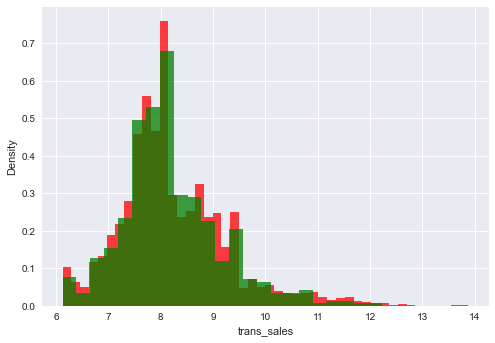

In [9]:
sns.histplot(raw_df['trans_sales'], color = 'red', label='population', stat="density", linewidth=0)
sns.histplot(raw_df[raw_df.simple_n]['trans_sales'], color = 'green', label = 'sample', stat="density", linewidth=0)

<AxesSubplot:xlabel='trans_sales', ylabel='Proportion'>

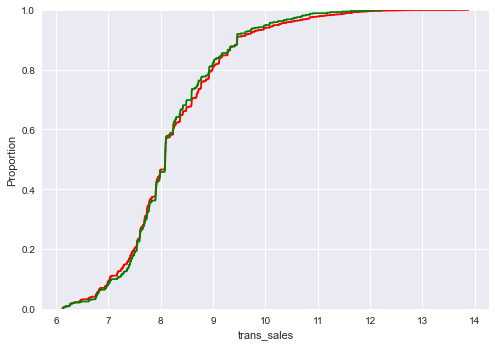

In [10]:
sns.ecdfplot(raw_df['trans_sales'], color = 'red')
sns.ecdfplot(raw_df[raw_df.simple_n]['trans_sales'], color = 'green')

<AxesSubplot:xlabel='trans_sales', ylabel='Density'>

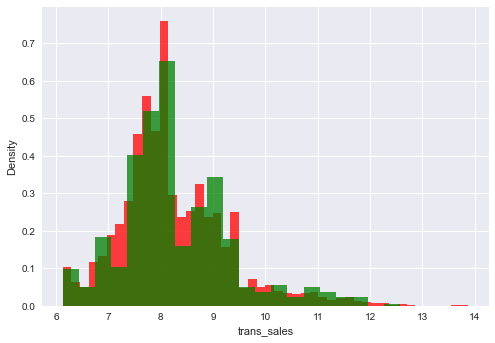

In [11]:
sns.histplot(raw_df['trans_sales'], color = 'red', label='population', stat="density", linewidth=0)
sns.histplot(raw_df[raw_df.systematic]['trans_sales'], color = 'green', label = 'sample', stat="density", linewidth=0)

<AxesSubplot:xlabel='trans_sales', ylabel='Proportion'>

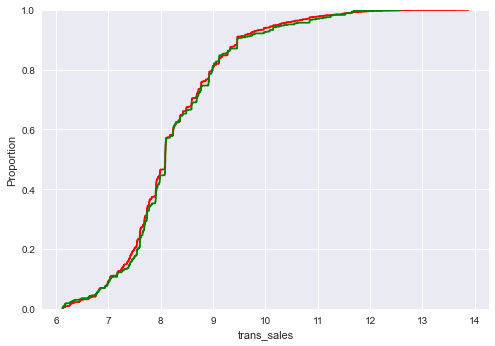

In [12]:
sns.ecdfplot(raw_df['trans_sales'], color = 'red')
sns.ecdfplot(raw_df[raw_df.systematic]['trans_sales'], color = 'green')

<AxesSubplot:xlabel='trans_sales', ylabel='Density'>

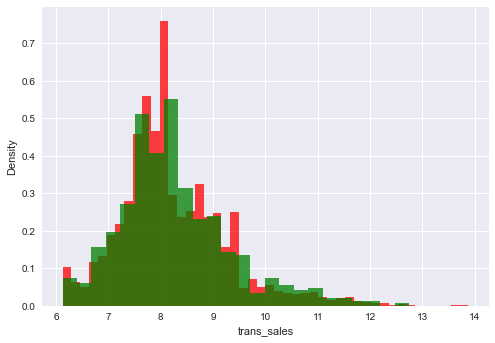

In [13]:
sns.histplot(raw_df['trans_sales'], color = 'red', label='population', stat="density", linewidth=0)
sns.histplot(raw_df[raw_df.stratified]['trans_sales'], color = 'green', label = 'sample', stat="density", linewidth=0)

<AxesSubplot:xlabel='trans_sales', ylabel='Proportion'>

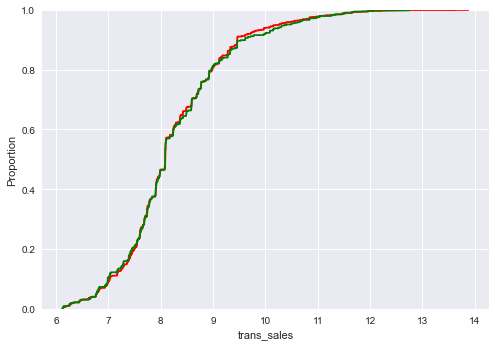

In [14]:
sns.ecdfplot(raw_df['trans_sales'], color = 'red')
sns.ecdfplot(raw_df[raw_df.stratified]['trans_sales'], color = 'green')

<AxesSubplot:xlabel='trans_sales', ylabel='Density'>

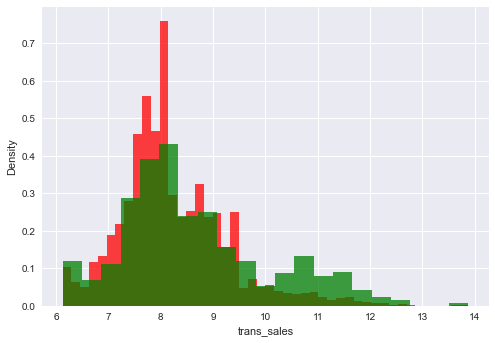

In [15]:
sns.histplot(raw_df['trans_sales'], color = 'red', label='population', stat="density", linewidth=0)
sns.histplot(raw_df[raw_df.purposive]['trans_sales'], color = 'green', label = 'sample', stat="density", linewidth=0)

<AxesSubplot:xlabel='trans_sales', ylabel='Proportion'>

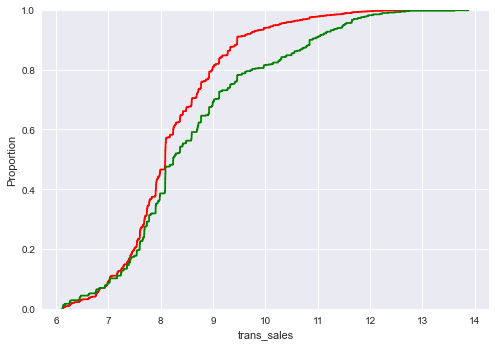

In [16]:
sns.ecdfplot(raw_df['trans_sales'], color = 'red')
sns.ecdfplot(raw_df[raw_df.purposive]['trans_sales'], color = 'green')